## **Write down the code for Logistic Regression Training and Prediction** (20 points)

`It should work for any given data given features and class label

## **More details below**



In [0]:
!pip install sklearn
!pip install pandas
!pip install numpy

In [0]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

### **Iris Dataset (Sample Dataset)**
Popular classification dataset with 3 classes; setosa, virginica and versicolor.

We will choose 2 of the classes for the sample dataset

```
https://en.wikipedia.org/wiki/Iris_flower_data_set
```



In [0]:
iris_data = load_iris(return_X_y=False)

In [0]:
iris_data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [0]:
df_iris = pd.DataFrame(data= np.c_[iris_data['data'], iris_data['target']],
                     columns= iris_data['feature_names'] + ['target'])

In [0]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [0]:
# Let's choose two of the classes; 'setosa', 'versicolor'; class 0 and class 1
#df_iris_sample = df_iris[df_iris["target"] != 2]
#df_iris_sample["target"].unique()
df_iris_sample = df_iris[df_iris["target"] != 0].copy()
df_iris_sample["target"].unique()
df_iris_sample.loc[df_iris_sample['target'] == 1.0,'target'] = 0.0
df_iris_sample.loc[df_iris_sample['target'] == 2.0,'target'] = 1.0

In [0]:
df_iris_sample.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [0]:
X = df_iris_sample[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']].to_numpy()
y = df_iris_sample[['target']].to_numpy().ravel()

In [0]:
type(X)

numpy.ndarray

In [0]:
type(y)

numpy.ndarray

## Your Logistic Regression Function from scratch (20 points)

You will write two main functions  one for training and one for prediction. 
Split data into test and training. Use training dataset to build model and measure the performance of your model on your test dataset. **(3 points)**

### **(A) Training** **(15 points)**

```
def logistic_regression_training(X, y, max_iter=1000, alpha=0.01, tol=1e-4):
  """ 
  Function to Train a Logistic Regression 

  Parameters: 
  X: numpy.ndarray of shape (n_samples, n_features)
      Training vector, where n_samples is the number of samples and n_features is the number of features.
  y: numpy.ndarray (n_samples,)
      Target vector relative to X.
  max_iter: int, default=100 
      Maximum number of iterations taken to converge.
  alpha: float, default=0.01
    Learning parameter
  tol: float, default=1e-4
  Returns: 
    numpy.ndarray of shape (n_features, 1)
    float
  """
```
  1. Initialize W and b to some random numbers (Anything other than 0.0)
  2. Repeat until convergence
  > 1. Use current w and b to compute predictions for all datapoints -> Forward Propagation** (5 points)
  > 2. Use predictions to compute current cost J(w, b) **-> Compute Cost Function (5 points)
  > 3. Adjust parameters w and b that can reduce cost --> BackPropagation + Gradient Descent (5 points)
  3. Return the weights for each of the input features + bias term
  ```
  return W, b
```


#### **Note:**

Make sure you can plot your iterations vs. training_error to see how gradient descent algorithm reduced the training error at each iteration


### **(B) Prediction** **(2 points)**
```
def logistic_regression_predict(x, W, b): 
    """ 
    Function to Predict using Logistic Regression 

    Parameters: 
    x: numpy.ndarray of shape (1, n_features)
        Vector for prediction, where n_features is the number of features.
    W: numpy.ndarray of shape (n_features, 1)
      Weights obtained from Logistic training
    b: float
      bias term
    Returns: 
     float
    """
  return prediction_probability
```


In [0]:
def logistic_regression_training(X, y, max_iter=1000, alpha=0.01, tol=1e-4):
  """ 
  Function to Train a Logistic Regression 

  Parameters: 
  X: numpy.ndarray of shape (n_samples, n_features)
      Training vector, where n_samples is the number of samples and n_features is the number of features.
  y: numpy.ndarray (n_samples,)
      Target vector relative to X.
  max_iter: int, default=100 
      Maximum number of iterations taken to converge.
  alpha: float, default=0.01
    Learning parameter
  tol: float, default=1e-4
  Returns: 
    numpy.ndarray of shape (n_features, 1)
    float
  """
  n_samples,n_features = X.shape
  W = [1 for i in range(n_features)]
  b = 0.5
  W_new = W
  b_new = b
  cost_capture = []
  #Gradient Descent
  for j in range(max_iter):

    W =  W_new
    b =  b_new
     
    y_predicted = logistic_regression_predict(X, W, b)

    cost = -1 * sum(y*np.log(y_predicted) + (1-y)*np.log(1-y_predicted))

    cost_capture.append(cost)



    print("cost "+str(cost))

    dw = (1 / n_samples) * np.dot(X.T,(y_predicted-y)) 
    db = (1 / n_samples) * np.sum(y_predicted -y)

    W_new = W - alpha * dw
    b_new = b - alpha * db
    print("W_new "+str(W))
    print("bias_new "+str(b))
    s = 0
    for i in range(len(W)):
       s = s + abs(W_new[i]-W[i])
    s = s + abs(b_new - b)
    print(s)
    if( s < 1e-4):
      print("converged at iteration"+ str(j))
      return W, b, j,cost_capture

  return W, b , j,cost_capture

In [0]:
def logistic_regression_predict(x, W, b):
   
   linear_model = np.dot(x,W) + b
   y_predicted = sigmoid(linear_model)
    
   return y_predicted


In [0]:
def logistic_regression_predict_class(x,W,b):
   
   linear_model = np.dot(x,W) + b
   y_predicted = sigmoid(linear_model)

   y_predicted_cls =[1 if i > 0.5 else 0 for i in y_predicted]
    
   return y_predicted_cls


   
     

In [0]:
def sigmoid(x):
  return 1 /  ( 1 + np.exp(-x) )

In [0]:
def accuracy(y_true,y_predict):

  accuracy_val = np.sum(y_true == y_predict) / len(y_true)

  return accuracy_val*100



In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 42)

W,b,No_of_iters,cost_capture = logistic_regression_training(X_train,y_train,max_iter=1000, alpha=0.01, tol=1e-4)

predictions = logistic_regression_predict_class(X_test,W,b)

print("logistic Reg Accuracy  "+str(accuracy(y_test,predictions)))





cost 491.20003029372634
W_new [1, 1, 1, 1]
bias_new 0.5
0.07252851196022314
cost 481.1991350069556
W_new [0.97200002 0.98655715 0.97995716 0.99367143]
bias_new 0.49528571861329307
0.07252849329748368
cost 471.1982452394959
W_new [0.94400005 0.97311431 0.95991432 0.98734287]
bias_new 0.4905714385690402
0.07252846869306634
cost 461.197362753236
W_new [0.91600009 0.95967147 0.93987149 0.98101431]
bias_new 0.48585716028932663
0.07252843622614275
cost 451.19648987315253
W_new [0.88800015 0.94622864 0.91982867 0.97468575]
bias_new 0.48114288433088415
0.07252839334486161
cost 441.19562968622535
W_new [0.86000022 0.93278582 0.89978586 0.96835719]
bias_new 0.4764286114287095
0.07252833665556924
cost 431.19478628503856
W_new [0.83200031 0.919343   0.87974307 0.96202864]
bias_new 0.4717143425540432
0.07252826164041465
cost 421.19396510148016
W_new [0.80400043 0.9059002  0.85970029 0.95570009]
bias_new 0.4670000789915148
0.0725281622785891
cost 411.193173354327
W_new [0.77600059 0.89245742 0.83965

1000
1000


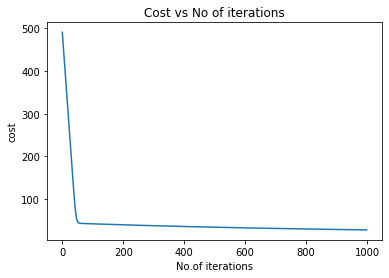

In [0]:
x_axis = []
for i in range(No_of_iters+1):
  x_axis.append(i)
print(len(x_axis))
print(len(cost_capture))
import matplotlib.pyplot as plt
plt.plot(x_axis,cost_capture)
plt.title('Cost vs No of iterations');
plt.xlabel('No.of iterations');
plt.ylabel('cost');